## **Name: C Ananda Krishnan**
[**Data Analytics Intern Assigment**]<br>

### Objective
The analysis begins with preprocessing and integrating datasets to ensure consistency by handling missing values, duplicates, and aligning identifiers. Next, the relationship between cooking sessions and user orders is examined to understand how cooking activities influence purchasing behavior. The most frequently cooked and ordered dishes are identified to help optimize the menu and inform promotional strategies. Finally, demographic factors such as age, location, and meal preferences are explored to understand their impact on user behavior, enabling targeted marketing and personalized recommendations.

# I. Data Cleaning and Merging

## **1. Data Integration and Validation with Pandas**

In [73]:
import pandas as pd

# Load the Excel file
excel_file = pd.ExcelFile('/content/Data Analyst Intern Assignment - Excel.xlsx')

In [74]:
# Parse each sheet
userdetails = excel_file.parse('UserDetails.csv')
cookingsession = excel_file.parse('CookingSessions.csv')
orderdetails = excel_file.parse('OrderDetails.csv')

In [75]:
user_sessions = pd.merge(cookingsession, userdetails, on='User ID', how='inner')

In [76]:
final_data = pd.merge(orderdetails, user_sessions, on=['User ID', 'Session ID'], how='inner')

In [77]:
final_data.to_excel('final_merged_data.xlsx', index=False)

In [78]:
# Save it as a CSV file
data.to_csv('final_merged_data.csv', index=False)

In [79]:
data = pd.read_csv('/content/final_merged_data.csv')

In [80]:
# Check for missing values
print(data.isnull().sum())

Order ID             0
User ID              0
Order Date           0
Meal Type_x          0
Dish Name_x          0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               2
Session ID           0
Dish Name_y          0
Meal Type_y          0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64


Inference:<br>
 The dataset has been analyzed for missing values, and it is observed that most columns are complete with no missing data. However, the Rating column has 2 missing values, which need to be addressed to ensure data consistency. These missing values can be handled by either filling them with an appropriate value (such as the mean, median, or mode) or by removing the rows containing them.*italicised text*

## **2. Converting Date Columns to DateTime Format**

In [81]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Session Start'] = pd.to_datetime(data['Session Start'])

Inference: Date columns are converted to datetime format for better handling of time-related operations like filtering or grouping by date.

## **3. Basic Descriptive Statistics**

In [82]:
print(data.describe())

          Order ID           Order Date  Amount (USD)     Rating  \
count    16.000000                   16     16.000000  14.000000   
mean   1008.500000  2024-12-04 12:00:00     11.250000   4.285714   
min    1001.000000  2024-12-01 00:00:00      7.000000   4.000000   
25%    1004.750000  2024-12-02 18:00:00      9.000000   4.000000   
50%    1008.500000  2024-12-04 12:00:00     11.500000   4.000000   
75%    1012.250000  2024-12-06 06:00:00     13.125000   4.750000   
max    1016.000000  2024-12-08 00:00:00     15.000000   5.000000   
std       4.760952                  NaN      2.435843   0.468807   

                    Session Start  Duration (mins)  Session Rating        Age  \
count                          16        16.000000       16.000000  16.000000   
mean   2024-12-05 02:50:37.500000        30.312500        4.518750  32.687500   
min           2024-12-01 12:00:00        10.000000        4.000000  25.000000   
25%           2024-12-03 08:37:30        20.000000        4.300

Inference: The dataset highlights an average order amount of $11.25, with a minimum of $7.00 and a maximum of $15.00. The average rating is 4.29, indicating positive feedback from customers. Session durations average 30.31 minutes, with a range between 10 and 45 minutes. User ages span from 25 to 42, and total orders per user vary from 5 to 15, reflecting a diverse customer engagement.


In [83]:
print(data.nunique())

Order ID             16
User ID               8
Order Date            8
Meal Type_x           3
Dish Name_x           6
Order Status          2
Amount (USD)         12
Time of Day           3
Rating                2
Session ID           16
Dish Name_y           6
Meal Type_y           3
Session Start        16
Session End          16
Duration (mins)       6
Session Rating       11
User Name             8
Age                   8
Location              8
Registration Date     8
Phone                 8
Email                 8
Favorite Meal         3
Total Orders          8
dtype: int64


Inference: The dataset contains 16 unique Order IDs and Session IDs, representing distinct transactions and sessions. There are 3 meal types, 6 unique dishes, and 2 order statuses (e.g., completed or canceled). User-specific data reveals 8 unique customers, each with distinct names, emails, and phone numbers, highlighting a moderate variety in customer demographics and preferences.

## **4. Frequency Count for Categorical Variables**

In [84]:
# Count frequency of each value for categorical columns (e.g., Meal Type, Dish Name, Order Status)
print(data['Meal Type_x'].value_counts())
print(data['Dish Name_x'].value_counts())
print(data['Order Status'].value_counts())


Meal Type_x
Dinner       8
Lunch        5
Breakfast    3
Name: count, dtype: int64
Dish Name_x
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64
Order Status
Completed    14
Canceled      2
Name: count, dtype: int64


Inference: The dataset indicates that dinner is the most common meal type with 8 occurrences, followed by lunch (5) and breakfast (3). Among the dishes, Spaghetti and Grilled Chicken are the most ordered items, each appearing 4 times, while dishes like Oatmeal are the least popular with only 1 order. Regarding order status, the majority of orders are completed (14), showcasing a high fulfillment rate, while only 2 orders were canceled, suggesting efficient order processing and customer satisfaction.


## **5. Spending Analysis**

In [85]:
# Total spending per order
total_spending = data['Amount (USD)'].sum()
print(f'Total Spending: ${total_spending}')

Total Spending: $180.0


Inference: The total revenue from all orders is $180.0, with an average spending of $11.25 per order, indicating a balanced spending trend.

In [86]:
# Average spending per order
average_spending = data['Amount (USD)'].mean()
print(f'Average Spending per Order: ${average_spending:.2f}')

Average Spending per Order: $11.25


Inference :Breakfast orders have the lowest average spending at $7.83, lunch  averages $10.00, and dinner has the highest average spending at $13.31, reflecting its premium nature.

In [87]:
# Average spending by meal type
avg_spending_by_meal = data.groupby('Meal Type_x')['Amount (USD)'].mean()
print(avg_spending_by_meal)

Meal Type_x
Breakfast     7.833333
Dinner       13.312500
Lunch        10.000000
Name: Amount (USD), dtype: float64


Inference: Breakfast orders have the lowest average spending at $7.83, lunch has a moderate average spending of $10.00, while dinner has the highest average spending at $13.31, indicating its premium nature.

In [88]:
# Total spending by each customer
spending_by_customer = data.groupby('User ID')['Amount (USD)'].sum()
print(spending_by_customer)

User ID
U001    35.0
U002    31.0
U003    32.0
U004    21.5
U005    22.5
U006    13.0
U007    14.0
U008    11.0
Name: Amount (USD), dtype: float64


Inference: Customer U001 has the highest total spending at $35.0, followed by U002 with $31.0. In contrast, U008 has the lowest total spending at $11.0, highlighting diverse spending behaviors among users.

In [89]:
# Average spend by each customer
avg_spending_by_customer = data.groupby('User ID')['Amount (USD)'].mean()
print(avg_spending_by_customer)

User ID
U001    11.666667
U002    10.333333
U003    10.666667
U004    10.750000
U005    11.250000
U006    13.000000
U007    14.000000
U008    11.000000
Name: Amount (USD), dtype: float64


Inference: Among all users, U007 has the highest average spending per order at $14.00, followed by U006 at $13.00. Other users, such as U001, U005, and U008, have an average spending closer to the dataset's overall mean.

## **6. Customer Behavior Analysis**

In [90]:
# Number of orders per customer
orders_per_customer = data['User ID'].value_counts()
print(orders_per_customer)

User ID
U001    3
U002    3
U003    3
U004    2
U005    2
U006    1
U007    1
U008    1
Name: count, dtype: int64


Inference: Customers U001, U002, and U003 placed the most orders, with 3 each, followed by U004 and U005 with 2 each. In contrast, U006, U007, and U008 placed only 1 order each, showcasing significant differences in customer engagement and ordering frequency.

In [91]:
# Meal preference by time of day
meal_by_time_of_day = data.groupby('Time of Day')['Meal Type_x'].value_counts()
print(meal_by_time_of_day)

Time of Day  Meal Type_x
Day          Lunch          5
Morning      Breakfast      3
Night        Dinner         8
Name: count, dtype: int64


Inference: The data shows that dinner is the most popular meal type with 8 orders during the night, followed by lunch with 5 orders during the day. Breakfast is the least popular, with 3 orders in the morning, indicating distinct preferences based on the time of day.

## **7. Ratings Analysis**

Meal Type_x
Breakfast    4.000000
Dinner       4.571429
Lunch        4.000000
Name: Rating, dtype: float64


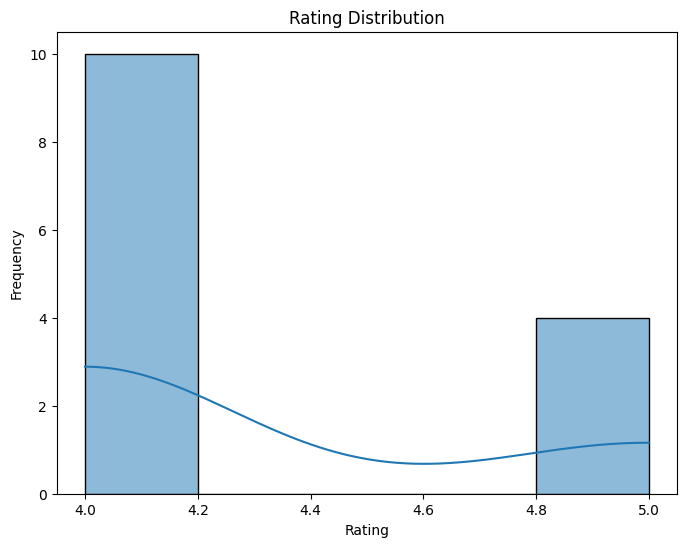

In [92]:
# Average ratings by meal type
avg_ratings_by_meal = data.groupby('Meal Type_x')['Rating'].mean()
print(avg_ratings_by_meal)

# Rating distribution (for all dishes or meal types)
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings for all orders
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Inference: The analysis reveals that dinner stands out with the highest average rating of 4.57, reflecting its superior customer satisfaction compared to breakfast and lunch, both of which have an average rating of 4. The rating distribution is bimodal, with a prominent cluster around 4.0 and another near 5.0. This indicates that while many customers are moderately satisfied, a significant portion rates their experience as excellent, highlighting diverse perceptions of quality.

## **8. Cancellation Analysis**

In [93]:
# Cancellation rate
cancellation_rate = data[data['Order Status'] == 'Canceled'].shape[0] / data.shape[0]
print(f'Cancellation Rate: {cancellation_rate:.2f}')

# Orders canceled by meal type
canceled_by_meal = data[data['Order Status'] == 'Canceled']['Meal Type_x'].value_counts()
print(canceled_by_meal)

# Cancellations by user
cancellations_by_user = data[data['Order Status'] == 'Canceled']['User ID'].value_counts()
print(cancellations_by_user)


Cancellation Rate: 0.12
Meal Type_x
Dinner    1
Lunch     1
Name: count, dtype: int64
User ID
U003    2
Name: count, dtype: int64


Inference: The cancellation rate stands at 12%, indicating that a small but notable portion of orders were not fulfilled. Both dinner and lunch experienced one cancellation each, highlighting that cancellations are not concentrated on a specific meal type. Interestingly, all cancellations were attributed to User U003, suggesting potential dissatisfaction or unique circumstances specific to this user, which may warrant further investigation to improve user experience and retention.

## **9. Session Duration Analysis**

Average Session Duration: 30.31 minutes


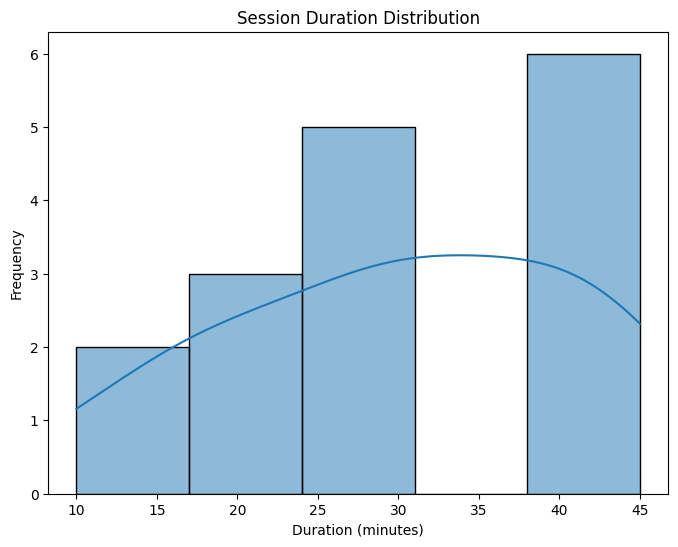

Meal Type_x
Breakfast    23.333333
Dinner       38.750000
Lunch        21.000000
Name: Duration (mins), dtype: float64


In [94]:
# Average session duration (in minutes)
average_session_duration = data['Duration (mins)'].mean()
print(f'Average Session Duration: {average_session_duration:.2f} minutes')

# Duration distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Duration (mins)'], kde=True)
plt.title('Session Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Average session duration by meal type
avg_duration_by_meal = data.groupby('Meal Type_x')['Duration (mins)'].mean()
print(avg_duration_by_meal)


Inference:<br>
- Dinner sessions have the longest average duration (38.75 minutes), indicating that users are more engaged and spend more time on the platform during this meal time.
- The session duration distribution is right-skewed, suggesting that a majority of sessions fall within a certain range, but there are a few sessions that last significantly longer.
- The data suggests that meal times have a noticeable impact on user engagement, with dinner being the peak time for longer sessions.

## **10. Customer Age Analysis**

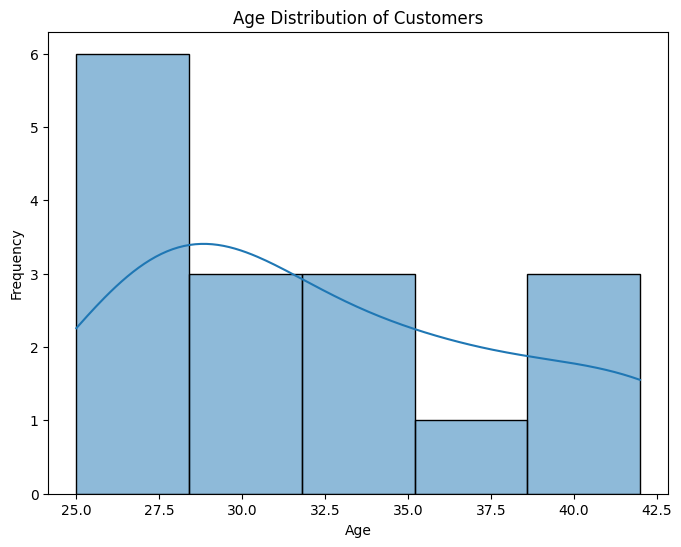

Age       Meal Type_x
(20, 30]  Dinner         5
          Lunch          2
          Breakfast      1
(30, 40]  Dinner         2
          Lunch          2
          Breakfast      1
(40, 50]  Breakfast      1
          Dinner         1
          Lunch          1
(50, 60]  Breakfast      0
          Dinner         0
          Lunch          0
Name: count, dtype: int64


<ipython-input-95-aa9e3e0a2202>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meal_by_age = data.groupby(age_groups)['Meal Type_x'].value_counts()


In [95]:
# Age distribution of customers
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Meal preference by age group
age_groups = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60])
meal_by_age = data.groupby(age_groups)['Meal Type_x'].value_counts()
print(meal_by_age)


Inference:<br>
-  Age Distribution: The majority of customers fall within the younger age groups (20-30 years).
- Meal Preference: Dinner is consistently the most preferred meal across all age groups.
- Age Group Variation: Younger age groups (20-30, 30-40) show a more balanced preference for breakfast, lunch, and dinner compared to older age groups.

# II. Analyzing the Relationship Between Cooking Sessions and User Orders

In [96]:
data['Session Start'] = pd.to_datetime(data['Session Start'], errors='coerce')
data['Session End'] = pd.to_datetime(data['Session End'], errors='coerce')

In [97]:
# Check for any rows where the conversion failed (NaT values)
print(data[['Session Start', 'Session End']].isna().sum())

Session Start    0
Session End      0
dtype: int64


## **Session Duration Calculation**

In [98]:
data['Session Duration'] = (data['Session End'] - data['Session Start']).dt.total_seconds() / 60  # Duration in minutes
data['Order Completion'] = data['Order Status'].apply(lambda x: 1 if x == 'Completed' else 0)

In [99]:
# Verify the new columns
print(data[['Session Duration', 'Order Completion']].head())

   Session Duration  Order Completion
0              30.0                 1
1              20.0                 1
2              40.0                 0
3              30.0                 1
4              15.0                 1


Inference:<br>

- The Session Duration varies between 15 and 40 minutes.
- The Order Completion status indicates whether the order was completed (1) or not (0).
- Most of the sessions with Order Completion marked as 1 (completed) have a session duration ranging from 15 to 40 minutes, indicating that longer sessions may be associated with completed orders.
- One session with an Order Completion of 0 (not completed) has a session duration of 40 minutes, suggesting that a longer session does not always guarantee order completion.

## **Visualizing Session Duration vs. Order Completion**

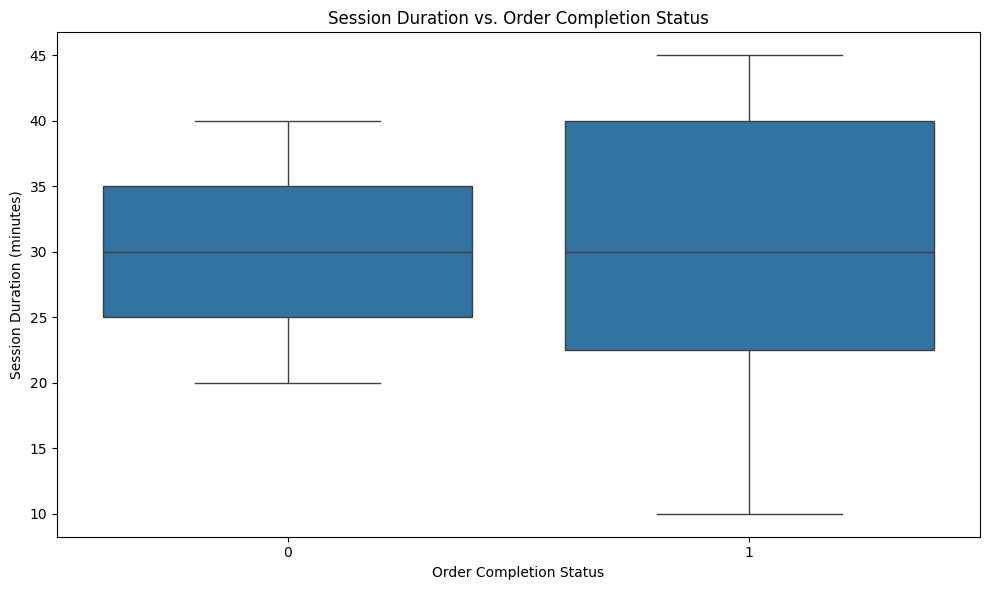

In [100]:
# Scatter plot to see the relationship between session duration and order completion
plt.figure(figsize=(10, 6))
sns.boxplot(x='Order Completion', y='Session Duration', data=data)
plt.title('Session Duration vs. Order Completion Status')
plt.xlabel('Order Completion Status')
plt.ylabel('Session Duration (minutes)')
plt.tight_layout()
plt.show()


Inference:<br>
- Box Plot Analysis: The box plot compares session durations for completed and canceled orders.<br>
- Potential Insights: It might reveal if longer sessions are associated with a higher likelihood of order completion.<br>
- Further Analysis: Exploring other visualizations like violin plots could provide more nuanced insights into the relationship between session duration and order completion.<br>

## **Correlation Analysis Between Session Rating and Order Completion**

In [101]:
# Correlation between Session Rating and Order Completion
correlation_session_rating = data[['Session Rating', 'Order Completion']].corr().iloc[0, 1]
print(f"Correlation between Session Rating and Order Completion: {correlation_session_rating:.2f}")

Correlation between Session Rating and Order Completion: -0.11


## **Location-based Session Performance Analysis**

In [102]:
# Analyze Location-based Session Performance
location_analysis = data.groupby(['Location'])[['Session Rating', 'Session Duration', 'Order Completion']].mean()

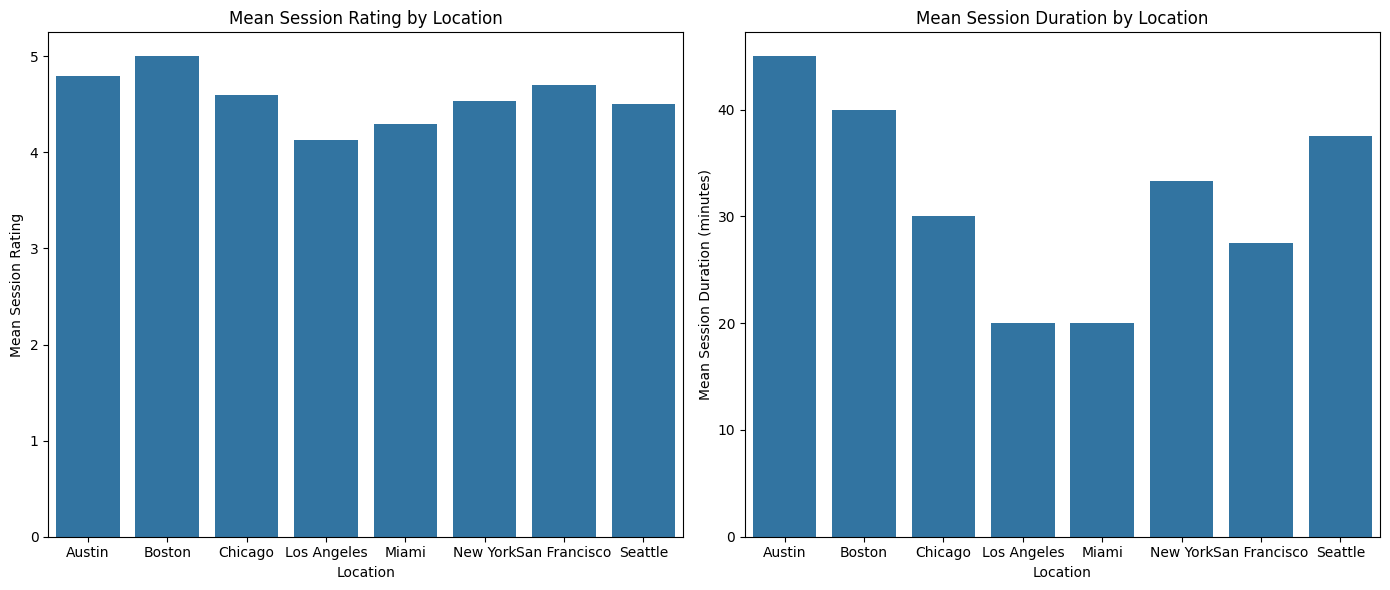

In [103]:
# Plot results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot mean session rating by location
sns.barplot(x=location_analysis.index, y=location_analysis['Session Rating'], ax=ax[0])
ax[0].set_title('Mean Session Rating by Location')
ax[0].set_ylabel('Mean Session Rating')
ax[0].set_xlabel('Location')

# Plot mean session duration by location
sns.barplot(x=location_analysis.index, y=location_analysis['Session Duration'], ax=ax[1])
ax[1].set_title('Mean Session Duration by Location')
ax[1].set_ylabel('Mean Session Duration (minutes)')
ax[1].set_xlabel('Location')

plt.tight_layout()
plt.show()

Inference:<br>

- Location-Based Engagement: User engagement, measured by session duration and rating, varies significantly across different locations.<br>
-  Session Rating Variation: Some locations demonstrate consistently higher session ratings, indicating greater user satisfaction with the platform's offerings or experience.<br>
- Session Duration Differences: Session durations exhibit substantial variation between locations, suggesting differences in user behavior and time spent on the platform.<br>
- Combined Analysis: By analyzing both session ratings and durations, it's possible to identify locations with a combination of high user satisfaction and prolonged engagement, indicating a positive and valuable user experience.<br>

# III. Identifying Popular Dishes

In [104]:
# Count the number of orders per dish
dish_order_count = data['Dish Name_x'].value_counts()

bins = [0, 10, 20, 30, 40, 50, 100]  # Define bins for 10-year intervals, with 50+ as one group
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']  # Labels for the age groups
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
# Top 10 most popular dishes
top_10_dishes = dish_order_count.head(10)
print("Top 10 Most Popular Dishes:\n", top_10_dishes)


Top 10 Most Popular Dishes:
 Dish Name_x
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


Inference:<br>

1) Top Dishes: Spaghetti and Grilled Chicken are the most popular dishes, each ordered 4 times.<br>
2) Other Favorites: Caesar Salad ranks next with 3 orders, followed by Pancakes and Veggie Burger (2 each).<br>
3) Least Popular in Top 10: Oatmeal appears with only 1 order.<br>

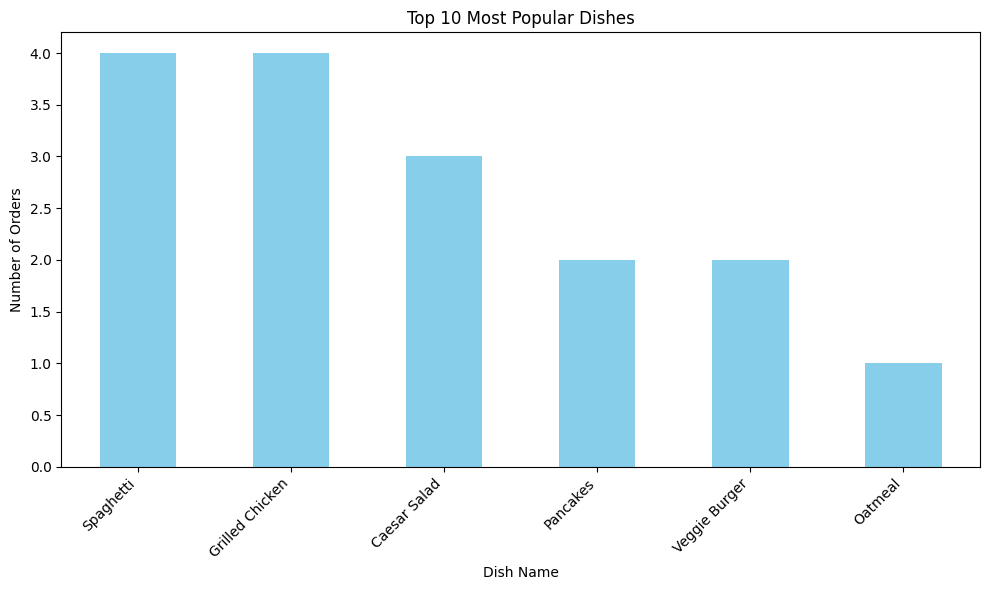

In [105]:
# Plot top 10 most popular dishes
plt.figure(figsize=(10, 6))
top_10_dishes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Dishes')
plt.ylabel('Number of Orders')
plt.xlabel('Dish Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Inference:

The bar chart highlights the top 10 most popular dishes:<br>

1) Top Choices: Spaghetti and Grilled Chicken are tied as the most ordered dishes, each with 4 orders.<br>
2) Other Favorites: Caesar Salad follows with 3 orders, while Pancakes and Veggie Burger have 2 each.<br>
3) Least Ordered: Oatmeal ranks last among the top 10 with 1 order.

<ipython-input-106-cf0953f8ef97>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dish_trends = data.groupby(['Age Group', 'Dish Name_x']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

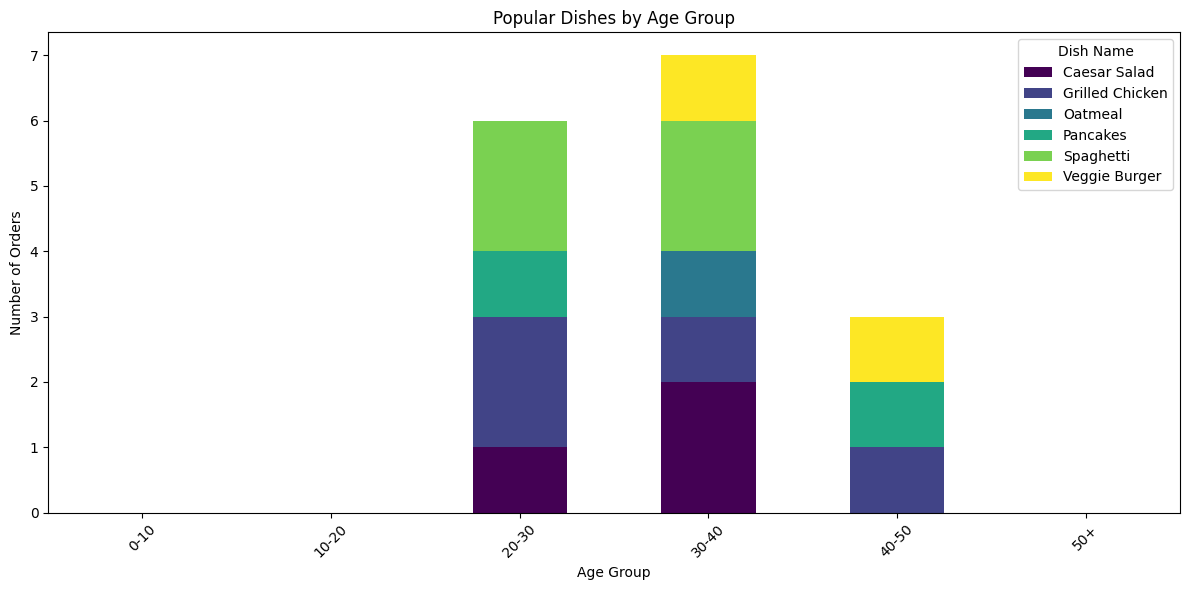

In [106]:
# Analyze popular dishes by Age Group
age_dish_trends = data.groupby(['Age Group', 'Dish Name_x']).size().unstack(fill_value=0)

# Plot popular dishes by Age Group
plt.figure(figsize=(12, 6))
age_dish_trends.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Popular Dishes by Age Group')
plt.ylabel('Number of Orders')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Dish Name')
plt.tight_layout()
plt.show()


Inference:<br>
1) Age 20-30: Orders the widest variety of dishes, with Spaghetti and Grilled Chicken being most popular.<br>
2) Age 30-40: Shows similar preferences, favoring Spaghetti and Grilled Chicken.<br>
3) Age 40-50: Orders fewer dishes, primarily Veggie Burger and Pancakes.<br>
4) Other Groups (0-20 and 50+): Minimal or no orders for the dishes analyzed.<br>

<Figure size 1200x600 with 0 Axes>

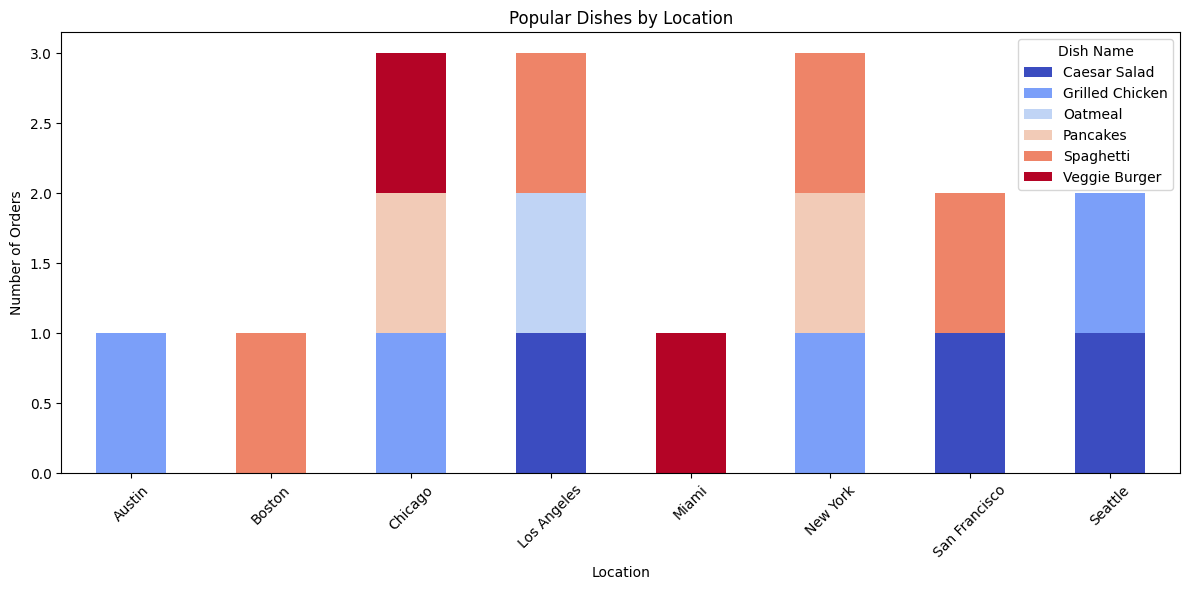

In [107]:
# Analyze popular dishes by Location
location_dish_trends = data.groupby(['Location', 'Dish Name_x']).size().unstack(fill_value=0)

# Plot popular dishes by Location
plt.figure(figsize=(12, 6))
location_dish_trends.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.title('Popular Dishes by Location')
plt.ylabel('Number of Orders')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.legend(title='Dish Name')
plt.tight_layout()
plt.show()


Inference:<br>
1) Regional Preferences: The analysis reveals distinct dish preferences across different locations.<br>
2) Menu Optimization: The findings can be used to optimize menus for specific locations by highlighting popular dishes in each region.<br>
3) Targeted Marketing: This information can inform targeted marketing campaigns by recommending dishes that are popular in a user's location.

<Figure size 1200x600 with 0 Axes>

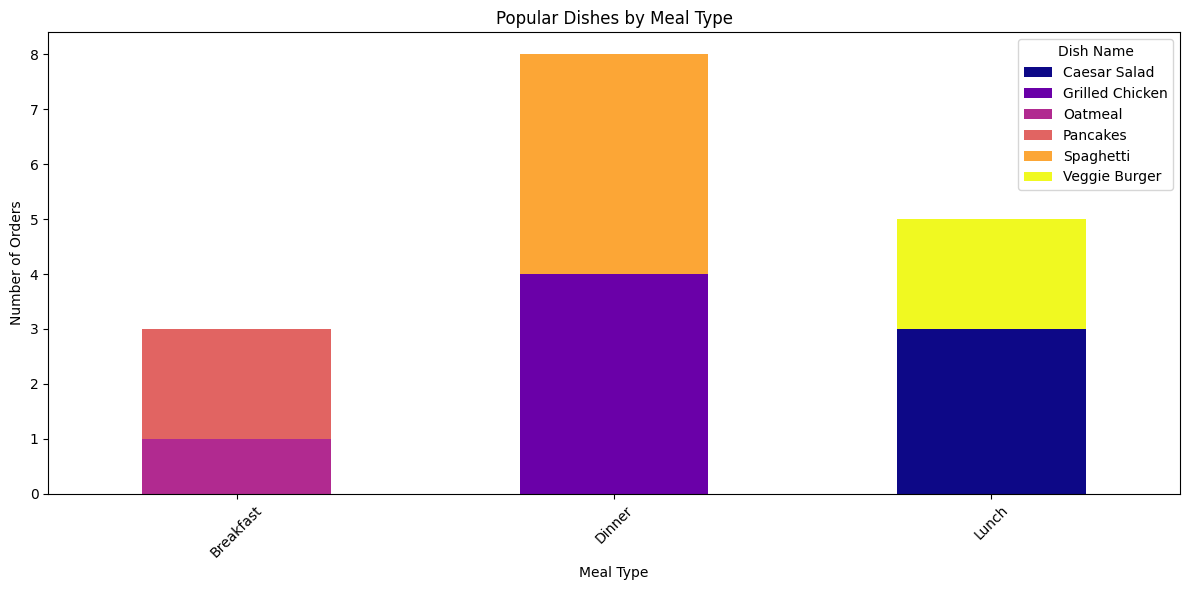

In [108]:
# Analyze popular dishes by Meal Type
meal_type_dish_trends = data.groupby(['Meal Type_x', 'Dish Name_x']).size().unstack(fill_value=0)

# Plot popular dishes by Meal Type
plt.figure(figsize=(12, 6))
meal_type_dish_trends.plot(kind='bar', stacked=True, colormap='plasma', figsize=(12, 6))
plt.title('Popular Dishes by Meal Type')
plt.ylabel('Number of Orders')
plt.xlabel('Meal Type')
plt.xticks(rotation=45)
plt.legend(title='Dish Name')
plt.tight_layout()
plt.show()



Inference:<br>
1) Meal-Specific Popularity: This analysis reveals distinct dish preferences for each meal type (Breakfast, Lunch, Dinner).<br>
2) Menu Optimization: The findings can guide menu planning by emphasizing popular dishes for each meal.<br>
3) Targeted Recommendations: The insights can be used to provide personalized dish recommendations based on the user's chosen meal type.<br>

In [109]:
# Rating Analysis of Popular Dishes
# Calculate the average rating for each dish
dish_ratings = data.groupby('Dish Name_x')['Rating'].mean()

# Top 10 rated dishes
top_rated_dishes = dish_ratings.sort_values(ascending=False).head(10)
print("Top 10 Rated Dishes:\n", top_rated_dishes)


Top 10 Rated Dishes:
 Dish Name_x
Grilled Chicken    4.666667
Spaghetti          4.500000
Caesar Salad       4.000000
Oatmeal            4.000000
Pancakes           4.000000
Veggie Burger      4.000000
Name: Rating, dtype: float64


Inference:<br>
1) Grilled Chicken is the top-rated dish with an average rating of 4.67.<br>
2) Several other dishes, including Spaghetti, Caesar Salad, and Oatmeal, also received high customer satisfaction ratings.<br>
3) This analysis provides valuable insights for menu planning and quality control.<br>

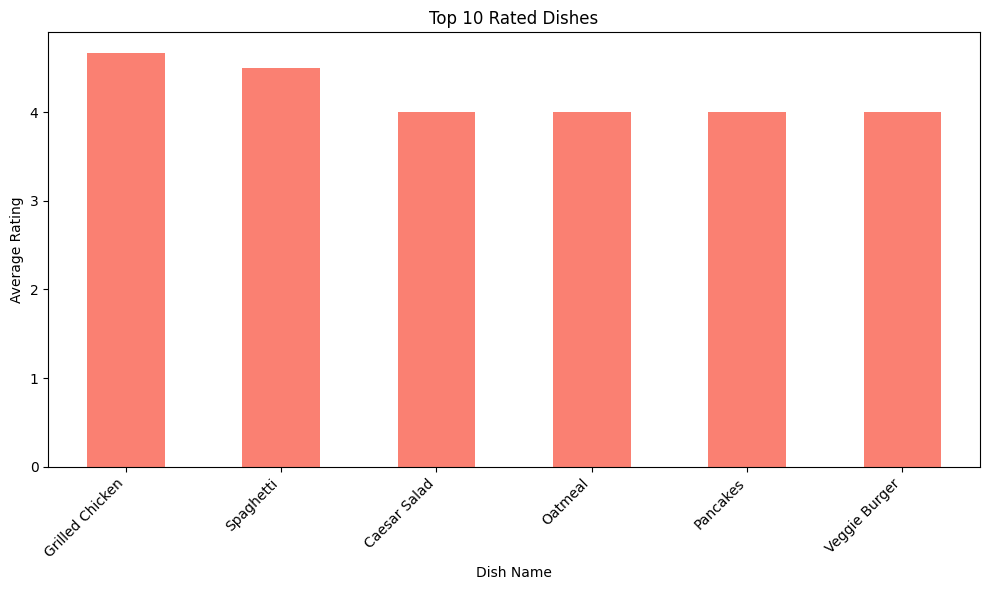

In [110]:
# Plot top 10 rated dishes
plt.figure(figsize=(10, 6))
top_rated_dishes.plot(kind='bar', color='salmon')
plt.title('Top 10 Rated Dishes')
plt.ylabel('Average Rating')
plt.xlabel('Dish Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Inference:

1) The chart confirms that Grilled Chicken has the highest average rating (around 4.67), followed by other dishes like Spaghetti and Caesar Salad.<br>
2) The horizontal bars with dish names on the x-axis and ratings on the y-axis allow for easy comparison of average ratings between dishes.<br>
3) The 45-degree rotation and right-alignment of dish names on the x-axis improve readability, especially for longer dish names.

# IV.  Exploring Demographic Factors That Influence User Behavior

In [111]:
# Preview the data
print("Dataset Overview:\n", data.head())

Dataset Overview:
    Order ID User ID Order Date Meal Type_x      Dish Name_x Order Status  \
0      1001    U001 2024-12-01      Dinner        Spaghetti    Completed   
1      1002    U002 2024-12-01       Lunch     Caesar Salad    Completed   
2      1003    U003 2024-12-02      Dinner  Grilled Chicken     Canceled   
3      1004    U001 2024-12-02   Breakfast         Pancakes    Completed   
4      1005    U004 2024-12-03       Lunch     Caesar Salad    Completed   

   Amount (USD) Time of Day  Rating Session ID  ... Age       Location  \
0          15.0       Night     5.0       S001  ...  28       New York   
1          10.0         Day     4.0       S002  ...  35    Los Angeles   
2          12.5       Night     NaN       S003  ...  42        Chicago   
3           8.0     Morning     4.0       S004  ...  28       New York   
4           9.0         Day     4.0       S005  ...  27  San Francisco   

     Registration Date         Phone              Email  Favorite Meal  \
0  20

Inference:<br>

1) Order Data: Tracks Order ID, User ID, meal types, and status (Completed or Canceled).<br>
2) User Info: Includes Name, Age, Location, and preferences (e.g., Favorite Meal).<br>
3) Financials: Order amounts range from 8 to 15.<br>
4) Ratings: Captures order and session ratings, mostly above 4.0.<br>
5) Time Insights: Records Time of Day and session durations for each order.<br>
6) User Activity: Users' total orders and repeated entries (e.g., Alice Johnson).<br>
7) Locations: Covers diverse areas like New York, Los Angeles, and Chicago.

## Add Age Group Column

In [112]:
# Convert 'Order Date' to datetime if not already done
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [113]:
bins = [0, 10, 20, 30, 40, 50, 100]  # Define bins for 10-year intervals, with 50+ as one group
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']  # Labels for the age groups
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

## Order Completion By Age Group

In [114]:
# Calculate order completion rate by age group (on a scale of 0 to 1)
completed_orders = data[data['Order Status'] == 'Completed'].groupby('Age Group')['Order ID'].count()
total_orders = data.groupby('Age Group')['Order ID'].count()

<ipython-input-114-b6a2ce166c12>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  completed_orders = data[data['Order Status'] == 'Completed'].groupby('Age Group')['Order ID'].count()
<ipython-input-114-b6a2ce166c12>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_orders = data.groupby('Age Group')['Order ID'].count()


## Calculate mean and standard deviation


In [115]:
# Calculate completion rate (fraction on scale of 0 to 1)
completion_rate = completed_orders / total_orders

# Calculate mean and standard deviation of completion rates
mean_completion_rate = completion_rate.mean()
std_dev_completion_rate = completion_rate.std()


In [116]:
# Display the result
print("Completion Rate by Age Group:")
print(completion_rate)
print(f"\nMean Completion Rate: {mean_completion_rate}")
print(f"Standard Deviation: {std_dev_completion_rate}")

Completion Rate by Age Group:
Age Group
0-10          NaN
10-20         NaN
20-30    1.000000
30-40    1.000000
40-50    0.333333
50+           NaN
Name: Order ID, dtype: float64

Mean Completion Rate: 0.7777777777777778
Standard Deviation: 0.3849001794597505


Inference: <br>

1) Completion Rates by Age Group:

- High completion rates (100%) were observed in the 20-30 and 30-40 age groups.<br>
-A significantly lower completion rate (33%) was found in the 40-50 age group.<br>
- No orders were completed in the 0-10, 10-20, and 50+ age groups (NaN values).<br>

2) Mean and Variability:

- The mean completion rate across all age groups is approximately 0.778, indicating that most orders were completed.<br>
- The standard deviation is 0.385, showing moderate variability in completion rates among age groups.

## Visualize Order Completion Rate by Age Group

<ipython-input-117-343982092212>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(completion_rate.index, rotation=45)


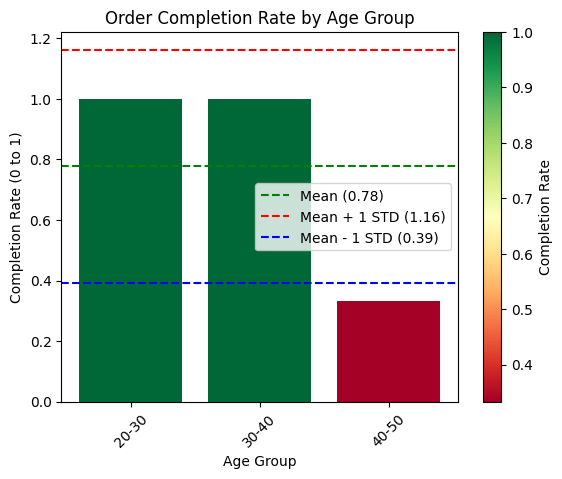

In [117]:
import matplotlib.colors as mcolors

# Optional: Visualize the result using a bar chart with red-to-green gradient color based on completion rate
fig, ax = plt.subplots()

# Create a red-to-green colormap for the bars based on the completion rate
cmap = plt.get_cmap('RdYlGn')  # Red-Yellow-Green colormap (Red to Green)
norm = mcolors.Normalize(vmin=completion_rate.min(), vmax=completion_rate.max())  # Normalize the values

# Plot bar chart with color gradient
bars = ax.bar(completion_rate.index, completion_rate, color=cmap(norm(completion_rate)))

# Set title and labels
ax.set_title('Order Completion Rate by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Completion Rate (0 to 1)')
ax.set_xticklabels(completion_rate.index, rotation=45)

# Add lines for mean, mean + 1 std dev, and mean - 1 std dev
ax.axhline(mean_completion_rate, color='green', linestyle='--', label=f'Mean ({mean_completion_rate:.2f})')
ax.axhline(mean_completion_rate + std_dev_completion_rate, color='red', linestyle='--', label=f'Mean + 1 STD ({mean_completion_rate + std_dev_completion_rate:.2f})')
ax.axhline(mean_completion_rate - std_dev_completion_rate, color='blue', linestyle='--', label=f'Mean - 1 STD ({mean_completion_rate - std_dev_completion_rate:.2f})')

# Display the legend
ax.legend()

# Add a colorbar to show the gradient scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array for the color bar
plt.colorbar(sm, ax=ax, label='Completion Rate')

# Show the plot
plt.show()

Inference:

1) Mean Completion Rate:

- The average order completion rate is 77.78%, indicating a generally high rate of order fulfillment.<br>

2)Standard Deviation:

- The average order completion rate is 77.78%, indicating a generally high rate of order fulfillment.<br>
- A standard deviation of 0.385 indicates moderate variability in completion rates across age groups.<br>

3)Age Group Performance:

- 20-30 and 30-40 age groups: Achieved a 100% completion rate, performing significantly above the mean.<br>
- 40-50 age group: Has a 33.33% completion rate, far below the mean and more than one standard deviation lower.<br>
- 0-10, 10-20, and 50+ age groups: No data or activity is available (NaN).<br>

Consistency and Variability:

- High-performing groups (20-30 and 30-40) have perfect rates, while the 40-50 group highlights inconsistency, contributing to variability.<br>
-The range of completion rates (0.33 to 1.0) demonstrates significant differences in performance.<br>

Outliers:

- The 40-50 age group is an outlier with completion rates significantly below the lower bound of one standard deviation (0.393).<br>


## Analyze Meal Preferences by Time of Day

<Figure size 1000x600 with 0 Axes>

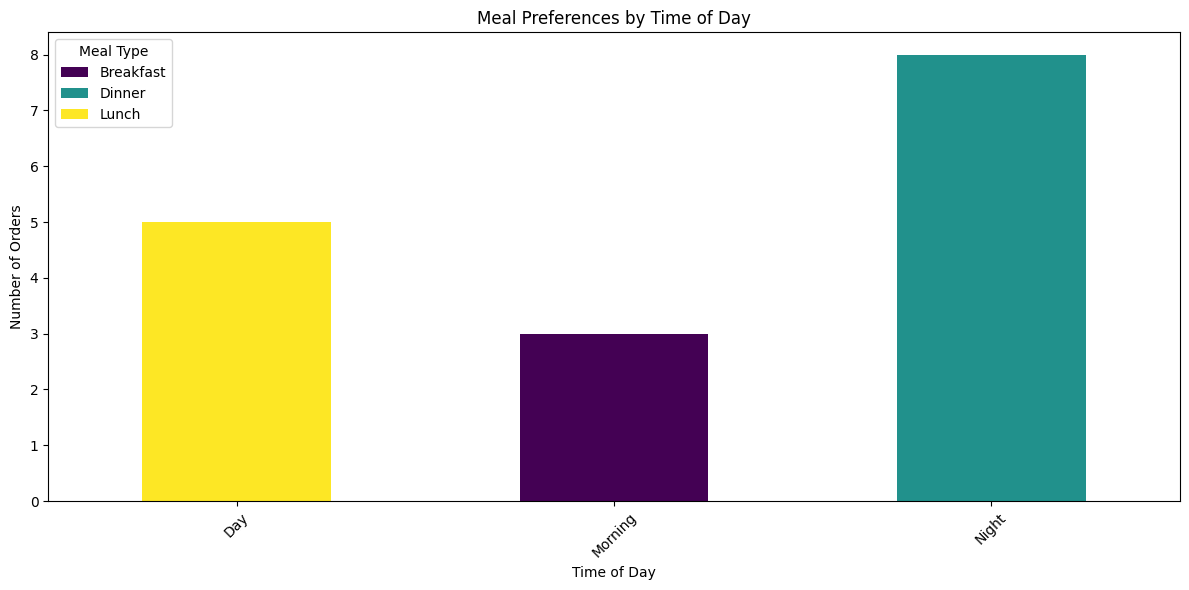

In [118]:
# Analyze Meal Preferences by Time of Day
time_meal_trends = data.groupby(['Time of Day', 'Meal Type_x']).size().unstack(fill_value=0)

# Plot meal type trends by time of day
plt.figure(figsize=(10, 6))
time_meal_trends.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Meal Preferences by Time of Day')
plt.ylabel('Number of Orders')
plt.xlabel('Time of Day')
plt.xticks(rotation=45)
plt.legend(title='Meal Type')
plt.tight_layout()
plt.show()

Inference:<br>
The chart highlights the following meal preferences by time of day:<br>

- Morning: Breakfast has the highest preference during this time.<br>
- Day: Lunch is the most ordered meal, aligning with midday consumption patterns.<br>
- Night: Dinner is the most preferred and has the highest number of orders overall.

## Analyze Meal Preferences by Location

<Figure size 1200x600 with 0 Axes>

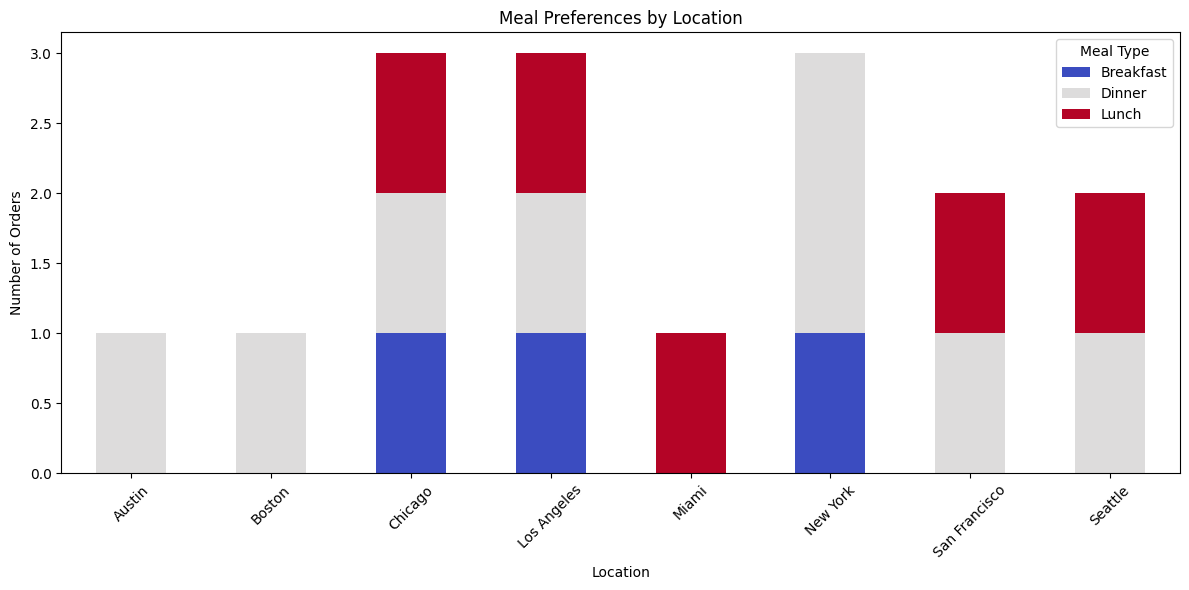

In [119]:
# Analyze Meal Preferences by Location
location_meal_trends = data.groupby(['Location', 'Meal Type_x']).size().unstack(fill_value=0)

# Plot meal preferences by location
plt.figure(figsize=(12, 6))
location_meal_trends.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.title('Meal Preferences by Location')
plt.ylabel('Number of Orders')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.legend(title='Meal Type')
plt.tight_layout()
plt.show()

Inference:<br>
The chart highlights meal preferences across locations:<br>

- Austin, Boston, and New York: Dinner dominates, with little or no breakfast and lunch demand.<br>
- Chicago and Los Angeles: Balanced demand for breakfast, lunch, and dinner.<br>
- Miami: Exclusively prefers lunch, with no breakfast or dinner orders.<br>
- San Francisco and Seattle: Equal preference for lunch and dinner, no breakfast demand.

## Analyze Meal Preferences by Age Group

<ipython-input-120-12c32bdb0766>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_meal_trends = data.groupby(['Age Group', 'Meal Type_x']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

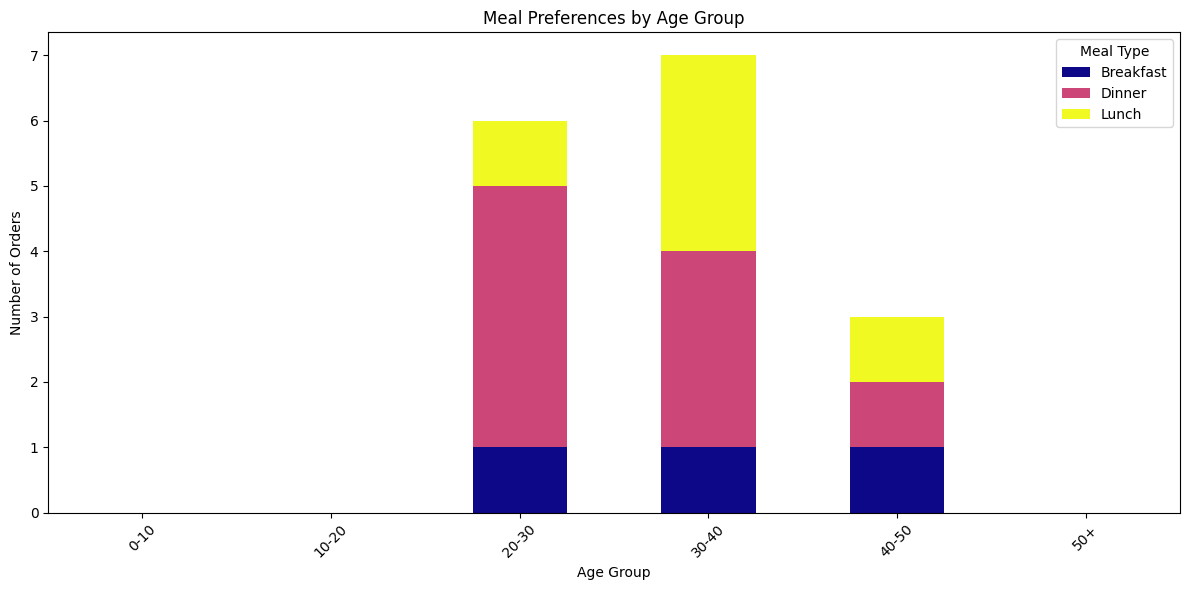

In [120]:
# Analyze Meal Preferences by Age Group
age_meal_trends = data.groupby(['Age Group', 'Meal Type_x']).size().unstack(fill_value=0)

# Plot meal preferences by age group
plt.figure(figsize=(12, 6))
age_meal_trends.plot(kind='bar', stacked=True, colormap='plasma', figsize=(12, 6))
plt.title('Meal Preferences by Age Group')
plt.ylabel('Number of Orders')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Meal Type')
plt.tight_layout()
plt.show()

Inference:<br>
The chart illustrates meal preferences segmented by age group:

- 20–30 and 30–40: Most active age groups with high preferences for dinner and lunch, showing a balanced demand.<br>
- 40–50: Moderate demand, with noticeable preferences for all three meal types, though lower compared to younger groups.<br>
- 0–10, 10–20, and 50+: Minimal or no orders observed.<br>

## Time-Based Trends in Meal Orders

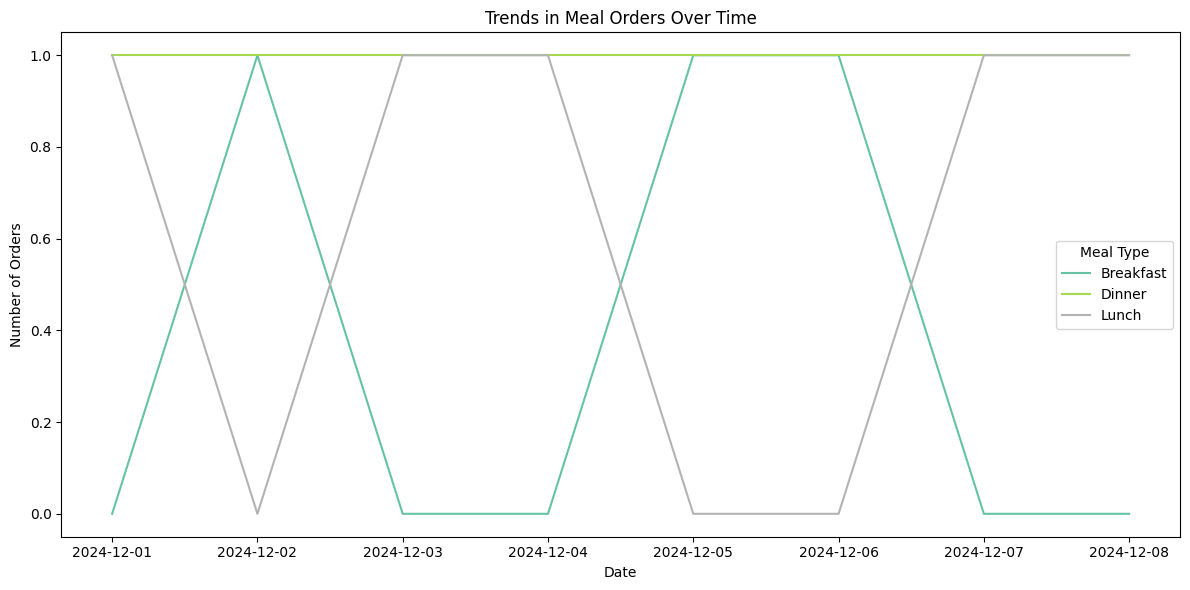

In [121]:
# Time-Based Trends
# Orders over time for each meal type
time_trends = data.groupby([data['Order Date'].dt.date, 'Meal Type_x']).size().unstack(fill_value=0)

# Plot time-based meal type trends
time_trends.plot(kind='line', colormap='Set2', figsize=(12, 6))
plt.title('Trends in Meal Orders Over Time')
plt.ylabel('Number of Orders')
plt.xlabel('Date')
plt.legend(title='Meal Type')
plt.tight_layout()
plt.show()

Inference:<br>
- Cyclic Trends: Meal orders show a cyclic pattern over time.<br>
- Dinner Consistency: Dinner maintains a stable demand across all dates.<br>
- Alternating Popularity: Breakfast and lunch orders alternate in popularity on different days.<br>
- Zero Orders: Certain days exhibit zero orders for breakfast and lunch.<br>
- Strategic Focus: Dinner can be a consistent offering, while promotions could boost breakfast and lunch demand on low-demand days.<br>

## Comprehensive Insights - Cross Analysis

<ipython-input-122-88eb91e2d765>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cross_analysis = data.groupby(['Time of Day', 'Location', 'Age Group', 'Meal Type_x']).size().reset_index(name='Counts')
<ipython-input-122-88eb91e2d765>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  dinner_trends = cross_analysis[cross_analysis['Meal Type_x'] == 'Dinner'].pivot_table(


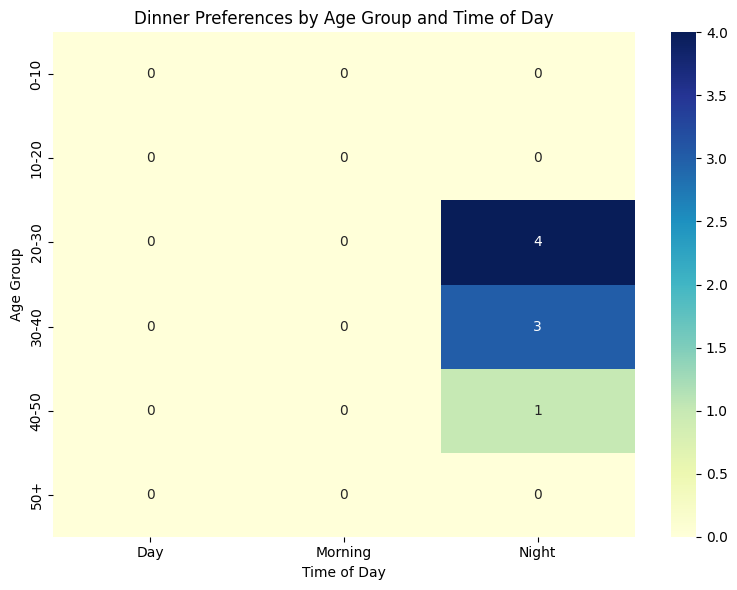

In [122]:
# Comprehensive Insights
# Cross-analysis: Time of day, location, and age group combined
cross_analysis = data.groupby(['Time of Day', 'Location', 'Age Group', 'Meal Type_x']).size().reset_index(name='Counts')

# Heatmap for one aspect of cross-analysis
dinner_trends = cross_analysis[cross_analysis['Meal Type_x'] == 'Dinner'].pivot_table(
    index='Age Group', columns='Time of Day', values='Counts', aggfunc='sum', fill_value=0
)

plt.figure(figsize=(8, 6))
sns.heatmap(dinner_trends, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Dinner Preferences by Age Group and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


Inference:<br>
The heatmap provides insights into dinner preferences based on age groups and time of day:

- Peak Dinner Preference: The "20-30" age group has the highest preference for dinner during the "Night" time, with a count of 4.<br>
- Declining Interest with Age: The preference for dinner during the night decreases with age. For instance, the "30-40" age group shows a count of 3, and the "40-50" age group shows a count of 1.<br>
- No Day or Morning Dinners: All age groups exclusively prefer dinner at night, with no counts recorded for "Day" or "Morning."<br>

## Insights Summary

In [123]:
# Insights
print("Top Meal Preferences by Age Group:\n", age_meal_trends.idxmax(axis=1))
print("\nTop Meal Preferences by Location:\n", location_meal_trends.idxmax(axis=1))
print("\nTime of Day Trends:\n", time_meal_trends.idxmax(axis=1))

Top Meal Preferences by Age Group:
 Age Group
0-10     Breakfast
10-20    Breakfast
20-30       Dinner
30-40       Dinner
40-50    Breakfast
50+      Breakfast
dtype: object

Top Meal Preferences by Location:
 Location
Austin              Dinner
Boston              Dinner
Chicago          Breakfast
Los Angeles      Breakfast
Miami                Lunch
New York            Dinner
San Francisco       Dinner
Seattle             Dinner
dtype: object

Time of Day Trends:
 Time of Day
Day            Lunch
Morning    Breakfast
Night         Dinner
dtype: object


Inference:<br>
- Age Group Preferences: Breakfast is popular for younger (0-20) and older (40+) groups, while dinner dominates for adults (20-40).<br>
- Location Trends: Dinner is favored in most cities, breakfast in Chicago/LA, and lunch in Miami.<br>
- Time of Day: Breakfast leads in the morning, lunch during the day, and dinner at night.<br>

## **Conclusion**

In conclusion, the analysis highlights key insights into user demographics, cooking preferences, and purchasing behaviors, identifying popular dishes like Spaghetti and Grilled Chicken. High-performing age groups (20-30 and 30-40) show perfect order completion rates, and regional patterns offer opportunities for targeted marketing. These insights help businesses improve customer experiences and drive growth through personalized strategies.